In [37]:
import torch
import torchvision as tv
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import copy
import numpy as np

In [2]:
transform = tv.transforms.Compose([
    tv.transforms.ToTensor()
])
train_dataset = tv.datasets.MNIST('mnist_data', train=True, download=True, transform=transform)
test_dataset = tv.datasets.MNIST('mnist_data', train=False, download=True, transform=transform)

In [3]:
num_batch = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=num_batch, shuffle=True) 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=num_batch, shuffle=False)

In [42]:
class ConvNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNet, self).__init__()
        
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        
        # First layer
        self.layer1 = nn.Conv2d(in_channels = 1, out_channels = 32, 
                                kernel_size = 5, stride = 1, padding = 2)
        # nn.ReLU()
        # Max Pool 1
        
        # Second layer
        self.layer2 = nn.Conv2d(in_channels = 32, out_channels = 64, 
                                kernel_size = 5, stride = 1, padding = 2)
        # nn.ReLU()
        # Max Pool 2
        
        # Fully Connected Layer
        # self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128) 
        self.fc2 = nn.Linear(128, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        
        out = self.layer2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        
        # Resize
        # Original size: (100, 32, 7, 7)
        # out.size(0): 100
        # New out size: (100, 32*7*7)        
        out = out.view(out.size(0), -1)
        
        out = self.fc1(out) 
        out = self.relu(out)
        out = self.fc2(out)
        
        return out        

In [33]:
def validate(model, test_loader):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.cuda()
        output = model(images)
        _, pred = torch.max(output, 1)
        pred = pred.data.cpu()
        total += output.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total

In [34]:
def train(train_loader, test_loader, numb_epoch=3, lr=1e-3, device="cpu"):
    len_train = len(train_loader)
    train_accuracies = []
    test_accuracies = []
    model = cnn_model.to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        c_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()    # обнуление градиентов
            pred = model(images.to(device))
            loss = loss_fn(pred, labels.to(device))
            loss.backward()          # обратное распространение ошибки
            optimizer.step()         # оптимизация
            c_loss += loss.item()
            lss = c_loss / len_train
        train_accuracy = float(validate(model, train_loader))
        test_accuracy = float(validate(model, test_loader))
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        if test_accuracy > max_accuracy:
            best_model = copy.deepcopy(model)
            max_accuracy = test_accuracy
            print("Saving Best Model with Accuracy: ", test_accuracy)
        print('Epoch:', epoch+1, "Loss : ", round(lss,8), "Train_accuracy :", train_accuracy,"Test_accuracy :", test_accuracy, '%')
    plt.figure()
    plt.plot(train_accuracies, label = "Train_accuracies")
    plt.plot(test_accuracies, label = "Test_accuracies")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.show()
    return best_model

In [35]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")
device

device(type='cuda', index=0)

In [36]:
cnn_model = ConvNet2(num_classes = 10)
cnn_model 

ConvNet2(
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (layer2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Saving Best Model with Accuracy:  98.04000091552734
Epoch: 1 Loss :  0.17425922 Train_accuracy : 97.79499816894531 Test_accuracy : 98.04000091552734 %
Saving Best Model with Accuracy:  98.8499984741211
Epoch: 2 Loss :  0.04700264 Train_accuracy : 99.08000183105469 Test_accuracy : 98.8499984741211 %
Saving Best Model with Accuracy:  99.02999877929688
Epoch: 3 Loss :  0.03177963 Train_accuracy : 99.30166625976562 Test_accuracy : 99.02999877929688 %
Saving Best Model with Accuracy:  99.05000305175781
Epoch: 4 Loss :  0.0240231 Train_accuracy : 99.44499969482422 Test_accuracy : 99.05000305175781 %
Epoch: 5 Loss :  0.01759794 Train_accuracy : 99.32833099365234 Test_accuracy : 98.91999816894531 %
Saving Best Model with Accuracy:  99.25
Epoch: 6 Loss :  0.01569472 Train_accuracy : 99.81500244140625 Test_accuracy : 99.25 %
Epoch: 7 Loss :  0.01182413 Train_accuracy : 99.788330078125 Test_accuracy : 99.22000122070312 %
Epoch: 8 Loss :  0.00982202 Train_accuracy : 99.81500244140625 Test_accuracy

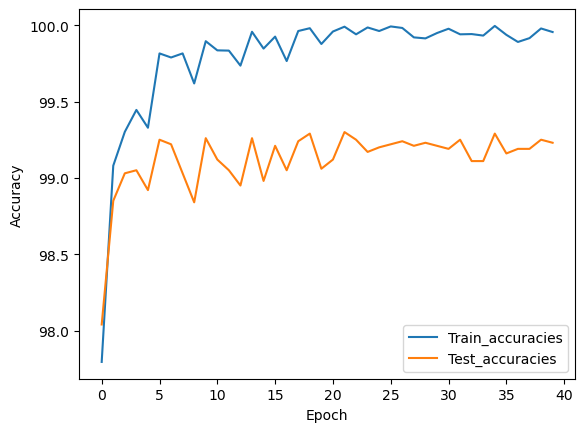

In [10]:
model_digit = train(train_loader, test_loader, 40, device=device)

In [30]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

data_dir = "D:\\2 курс\\курсовая\\math_symb\\train\\"
test_data_dir = "D:\\2 курс\\курсовая\\math_symb\\test\\"

train_dataset_symb = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((28, 28)),transforms.ToTensor(),transforms.Grayscale()
]))
test_dataset_symb = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((28, 28)),transforms.ToTensor(),transforms.Grayscale()
]))

In [155]:
len(train_dataset_symb)

225344

In [156]:
len(test_dataset_symb)

56373

In [157]:
len(train_dataset_symb)+len(test_dataset_symb)

281717

In [38]:
train_loader_symb = torch.utils.data.DataLoader(dataset=train_dataset_symb, batch_size=num_batch, shuffle=True) 
test_loader_symb = torch.utils.data.DataLoader(dataset=test_dataset_symb, batch_size=num_batch, shuffle=False)

In [39]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")
device

device(type='cuda', index=0)

In [43]:
cnn_model = ConvNet(num_classes = 72)
cnn_model 

ConvNet(
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (layer2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=72, bias=True)
)

Saving Best Model with Accuracy:  91.94650268554688
Epoch: 1 Loss :  0.66662519 Train_accuracy : 92.07389831542969 Test_accuracy : 91.94650268554688 %
Saving Best Model with Accuracy:  94.07518005371094
Epoch: 2 Loss :  0.23565115 Train_accuracy : 94.31314086914062 Test_accuracy : 94.07518005371094 %
Saving Best Model with Accuracy:  94.89472198486328
Epoch: 3 Loss :  0.17195757 Train_accuracy : 95.397705078125 Test_accuracy : 94.89472198486328 %
Saving Best Model with Accuracy:  95.68765258789062
Epoch: 4 Loss :  0.13326284 Train_accuracy : 96.1738510131836 Test_accuracy : 95.68765258789062 %
Saving Best Model with Accuracy:  96.65265655517578
Epoch: 5 Loss :  0.10443384 Train_accuracy : 97.21847534179688 Test_accuracy : 96.65265655517578 %
Saving Best Model with Accuracy:  97.37462615966797
Epoch: 6 Loss :  0.0870322 Train_accuracy : 97.92450714111328 Test_accuracy : 97.37462615966797 %
Saving Best Model with Accuracy:  97.43494415283203
Epoch: 7 Loss :  0.07216451 Train_accuracy : 9

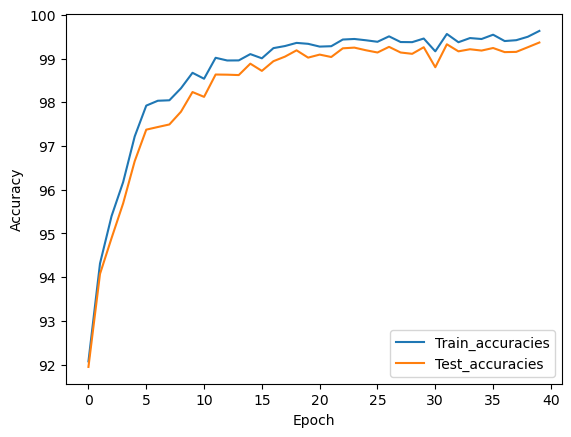

In [44]:
model_symb = train(train_loader_symb, test_loader_symb, 40, device=device)

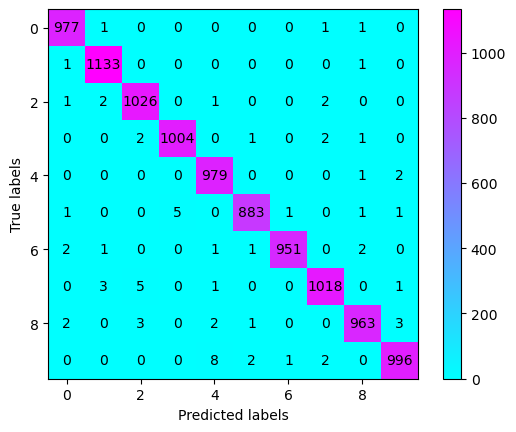

In [29]:
import torch
import torchvision
from torchvision import transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Переключение модели на режим оценки (evaluation mode)
model_digit.eval()

# Списки для истинных меток и предсказанных меток
true_labels = []
predicted_labels = []

# Проход по тестовому набору данных
for images, labels in test_loader:
    images = images.cuda()
    outputs = model_digit(images)
    _, predicted = torch.max(outputs.data.cpu(), 1)
    
    # Добавление истинных меток и предсказанных меток в соответствующие списки
    true_labels.extend(labels.tolist())
    predicted_labels.extend(predicted.tolist())

# Преобразование списков меток в numpy-массивы
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Получение матрицы ошибок
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Визуализация матрицы ошибок
plt.imshow(confusion_mat, cmap='cool', interpolation='nearest')

# Добавляем значения в каждую ячейку матрицы ошибок
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, str(confusion_mat[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")


plt.show()

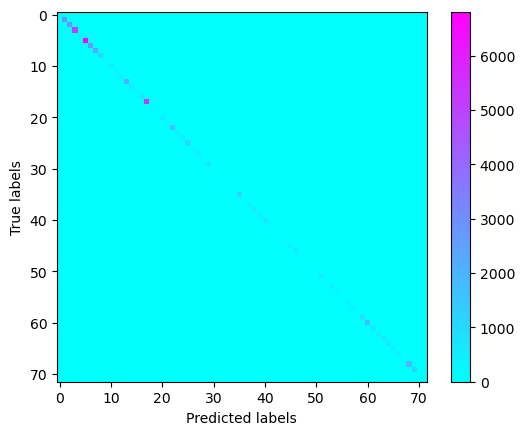

In [48]:
# Переключение модели на режим оценки (evaluation mode)
model_symb.eval()

# Списки для истинных меток и предсказанных меток
true_labels_symb = []
predicted_labels_symb = []

# Проход по тестовому набору данных
for images, labels in test_loader_symb:
    images = images.cuda()
    outputs = model_symb(images)
    _, predicted = torch.max(outputs.data.cpu(), 1)
    
    # Добавление истинных меток и предсказанных меток в соответствующие списки
    true_labels_symb.extend(labels.tolist())
    predicted_labels_symb.extend(predicted.tolist())

# Преобразование списков меток в numpy-массивы
true_labels_symb = np.array(true_labels_symb)
predicted_labels_symb = np.array(predicted_labels_symb)

# Получение матрицы ошибок
confusion_mat = confusion_matrix(true_labels_symb, predicted_labels_symb)

# Визуализация матрицы ошибок
plt.imshow(confusion_mat, cmap='cool', interpolation='nearest')

# Добавляем значения в каждую ячейку матрицы ошибок
#for i in range(confusion_mat.shape[0]):
#    for j in range(confusion_mat.shape[1]):
#        plt.text(j, i, str(confusion_mat[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")


plt.show()

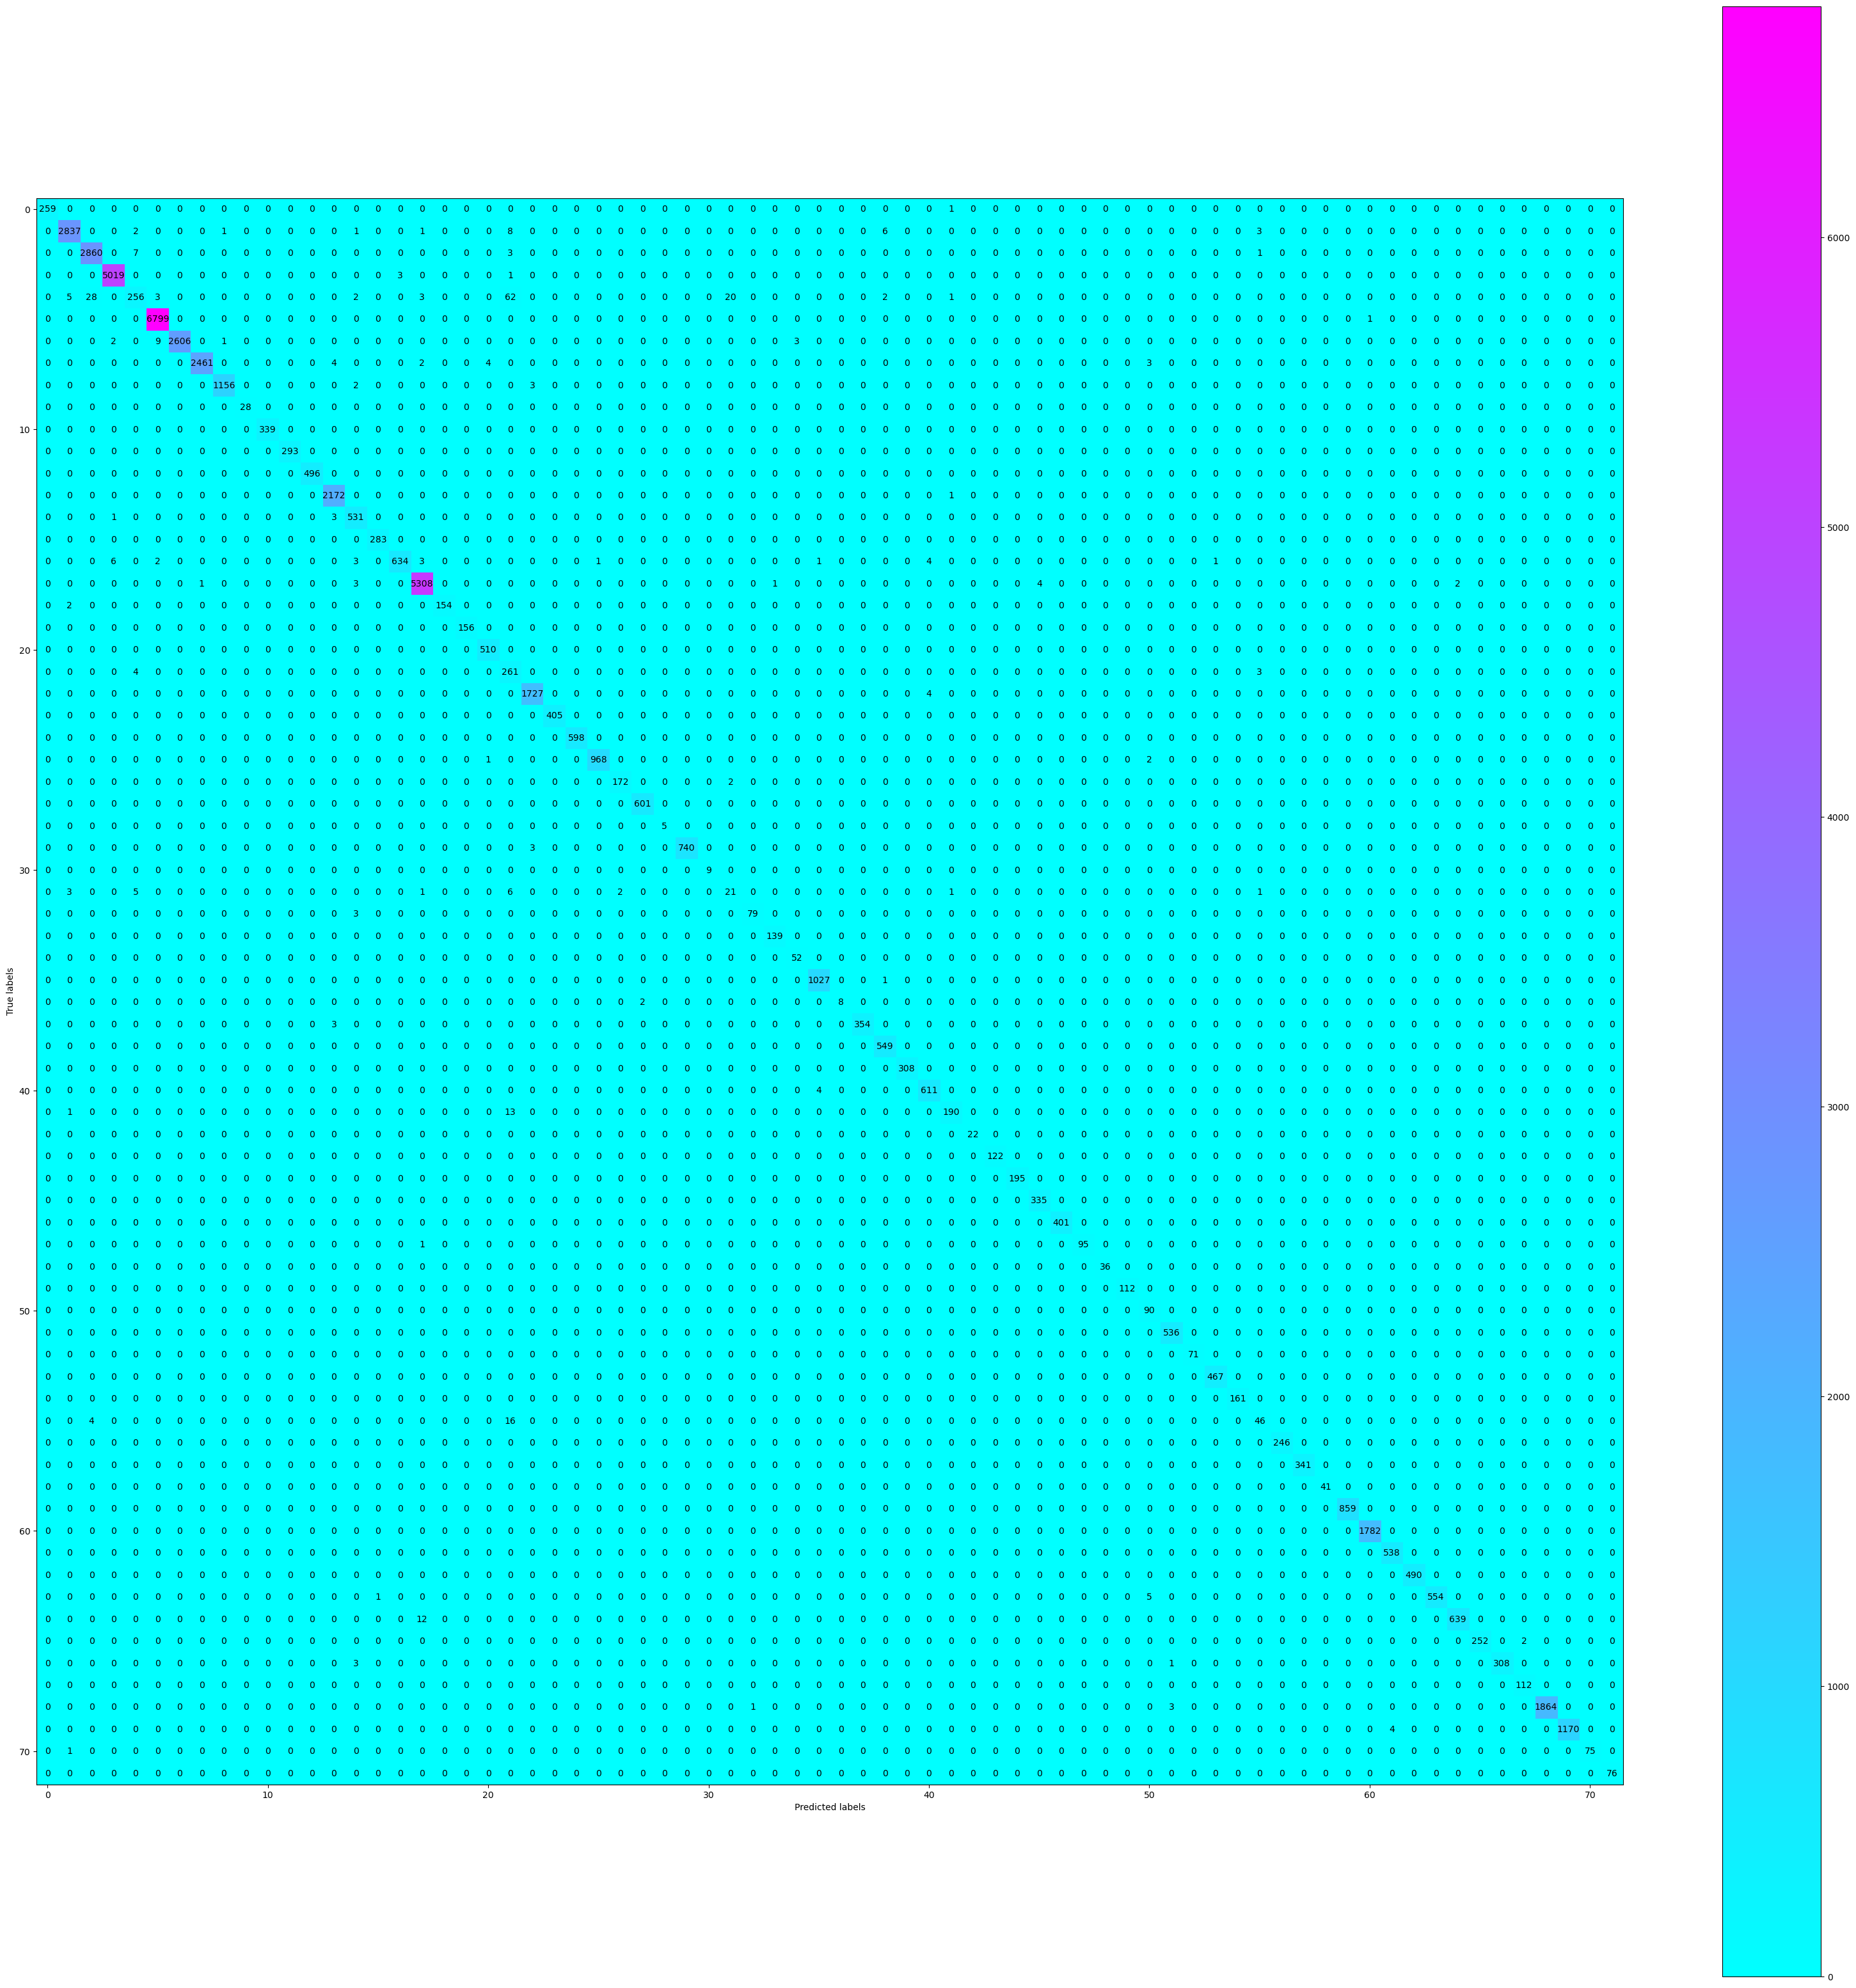

In [56]:
# Переключение модели на режим оценки (evaluation mode)
model_symb.eval()

# Списки для истинных меток и предсказанных меток
true_labels_symb = []
predicted_labels_symb = []

# Проход по тестовому набору данных
for images, labels in test_loader_symb:
    images = images.cuda()
    outputs = model_symb(images)
    _, predicted = torch.max(outputs.data.cpu(), 1)
    
    # Добавление истинных меток и предсказанных меток в соответствующие списки
    true_labels_symb.extend(labels.tolist())
    predicted_labels_symb.extend(predicted.tolist())

# Преобразование списков меток в numpy-массивы
true_labels_symb = np.array(true_labels_symb)
predicted_labels_symb = np.array(predicted_labels_symb)

# Получение матрицы ошибок
confusion_mat = confusion_matrix(true_labels_symb, predicted_labels_symb)

plt.figure(figsize = (40,40))

# Визуализация матрицы ошибок
plt.imshow(confusion_mat, cmap='cool', interpolation='nearest')

# Добавляем значения в каждую ячейку матрицы ошибок
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, str(confusion_mat[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(n)
plt.yticks()

plt.show()

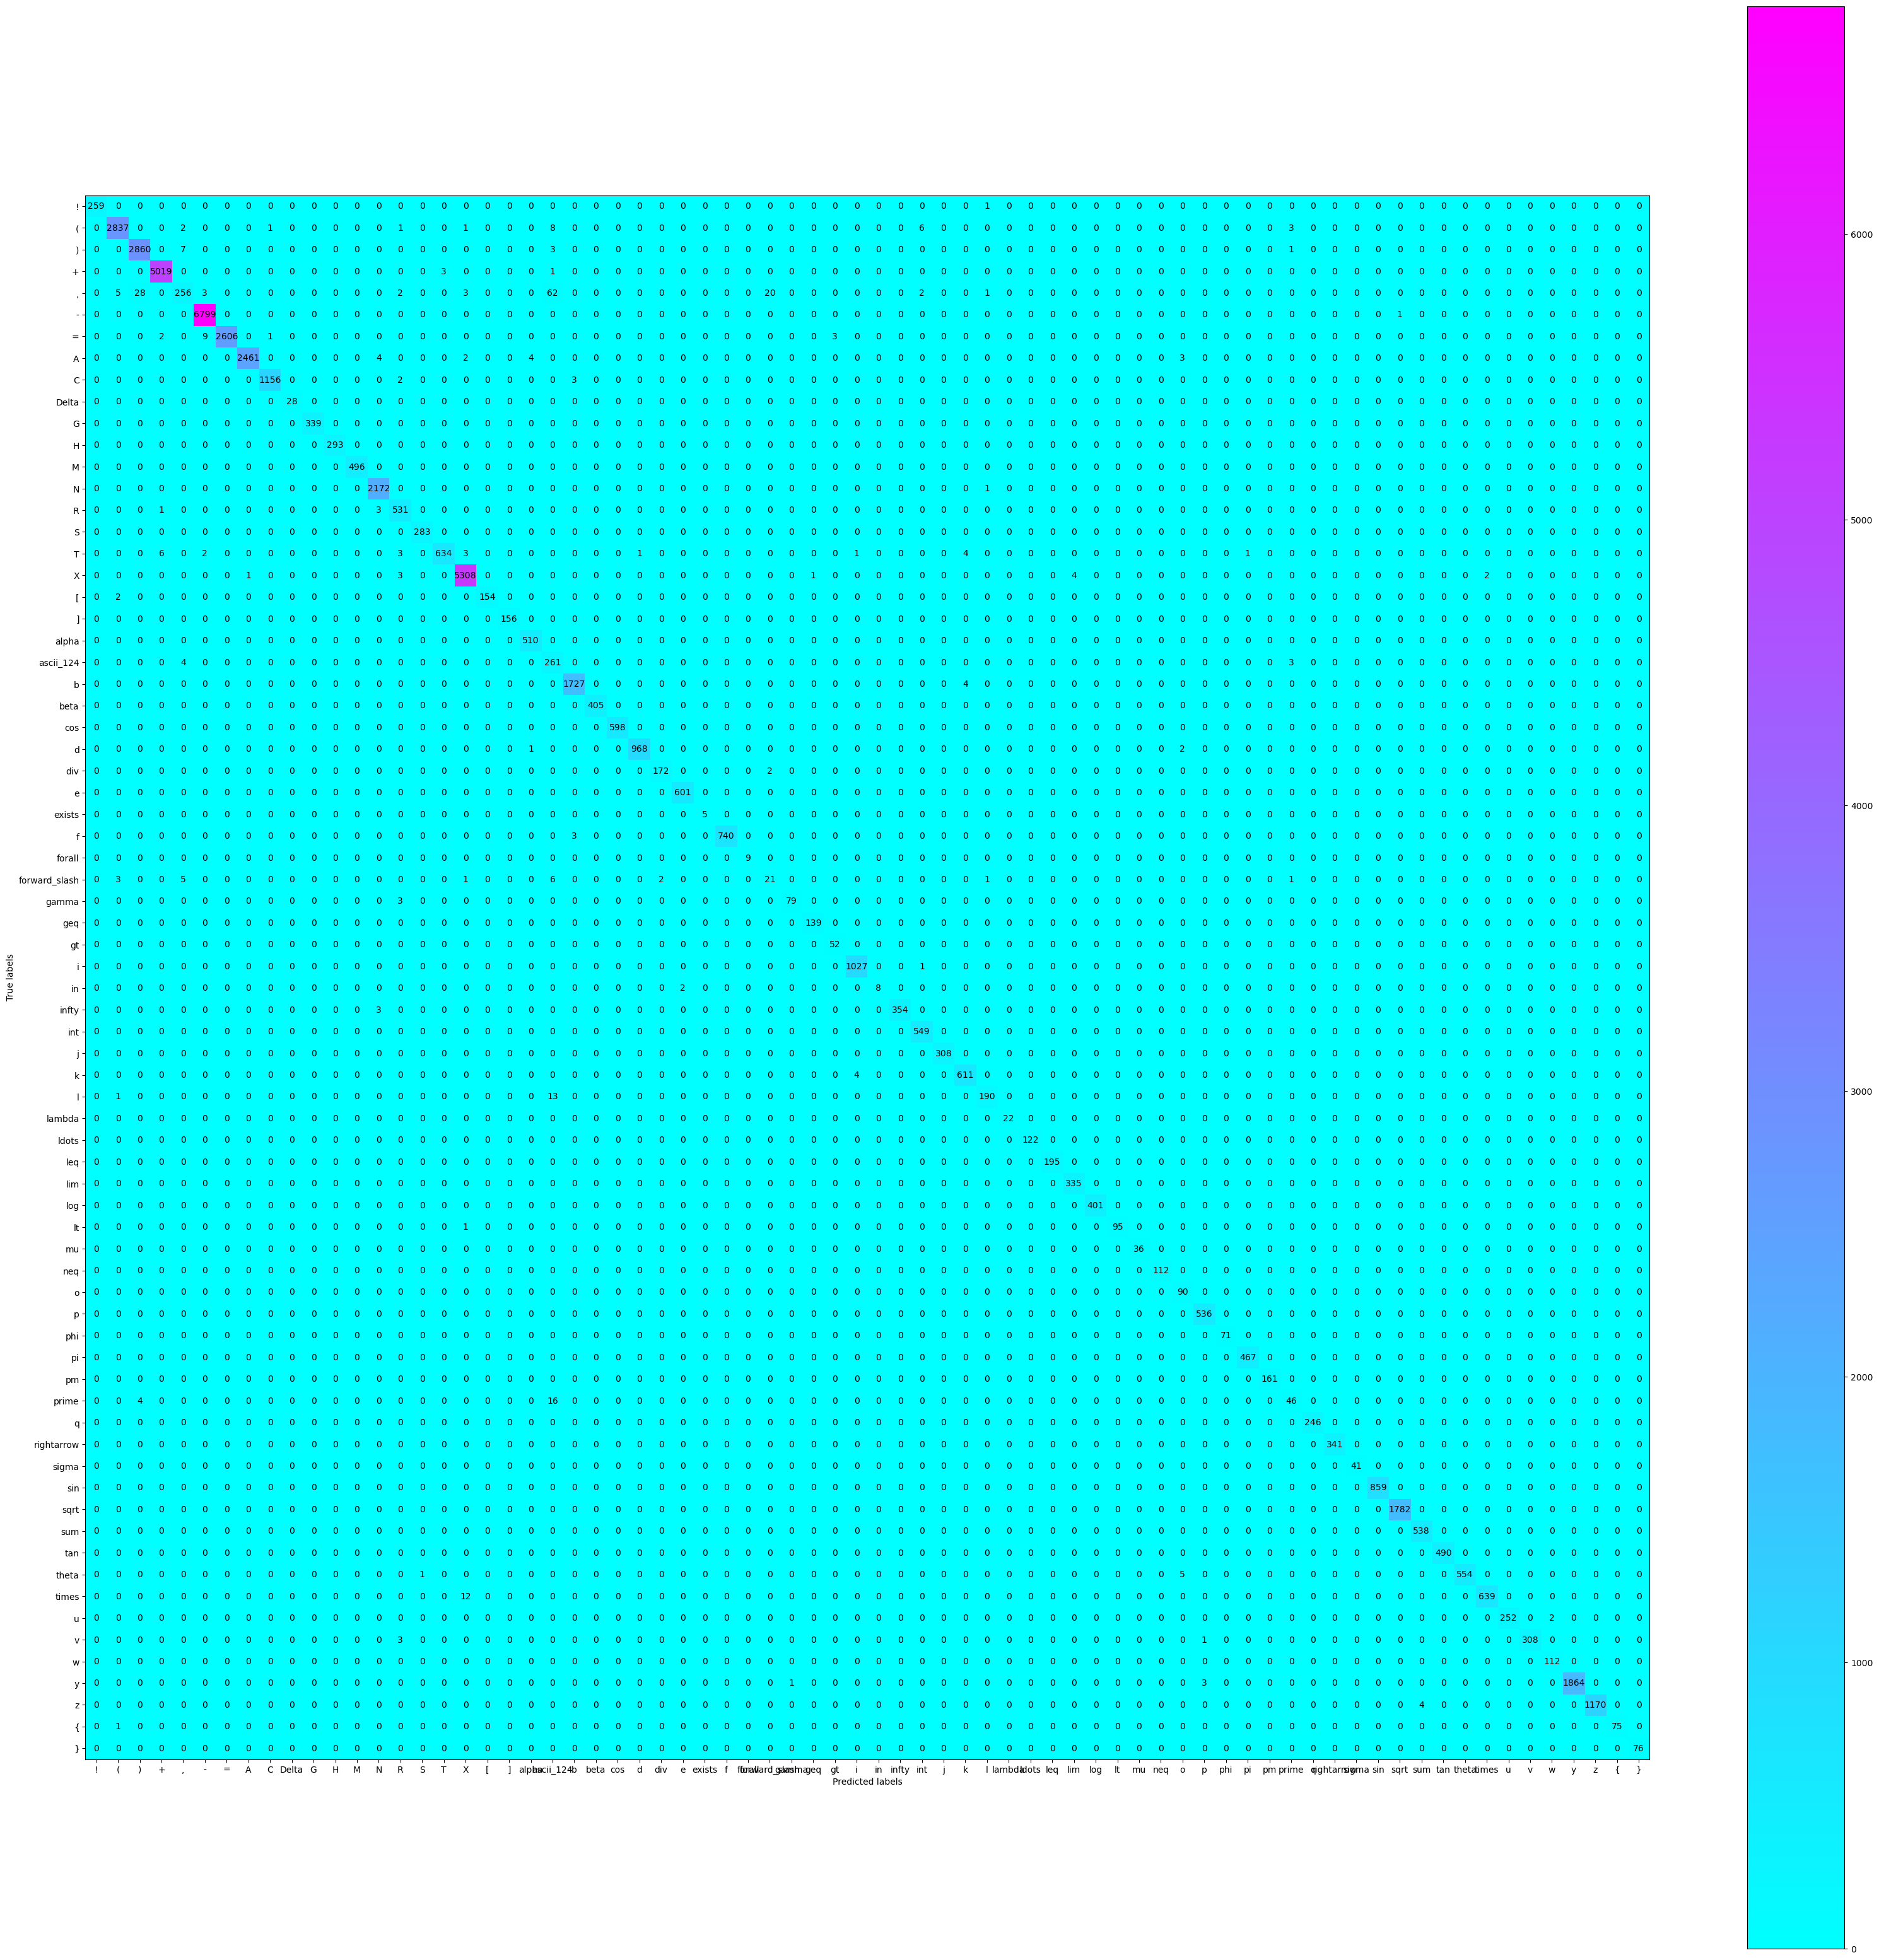

In [57]:
# Переключение модели на режим оценки (evaluation mode)
model_symb.eval()

# Списки для истинных меток и предсказанных меток
true_labels_symb = []
predicted_labels_symb = []

# Проход по тестовому набору данных
for images, labels in test_loader_symb:
    images = images.cuda()
    outputs = model_symb(images)
    _, predicted = torch.max(outputs.data.cpu(), 1)
    
    # Добавление истинных меток и предсказанных меток в соответствующие списки
    true_labels_symb.extend(labels.tolist())
    predicted_labels_symb.extend(predicted.tolist())

# Преобразование списков меток в numpy-массивы
true_labels_symb = np.array(true_labels_symb)
predicted_labels_symb = np.array(predicted_labels_symb)

# Получение матрицы ошибок
confusion_mat = confusion_matrix(true_labels_symb, predicted_labels_symb)
class_labels = train_dataset_symb.classes

plt.figure(figsize = (40,40))

# Визуализация матрицы ошибок
plt.imshow(confusion_mat, cmap='cool', interpolation='nearest')

# Добавляем значения в каждую ячейку матрицы ошибок
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, str(confusion_mat[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.xticks(np.arange(len(class_labels)),class_labels)
plt.yticks(np.arange(len(class_labels)),class_labels)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.show()

In [ ]:
# Переключение модели на режим оценки (evaluation mode)
model_symb.eval()

# Списки для истинных меток и предсказанных меток
true_labels_symb = []
predicted_labels_symb = []

# Проход по тестовому набору данных
for images, labels in test_loader_symb:
    images = images.cuda()
    outputs = model_symb(images)
    _, predicted = torch.max(outputs.data.cpu(), 1)
    
    # Добавление истинных меток и предсказанных меток в соответствующие списки
    true_labels_symb.extend(labels.tolist())
    predicted_labels_symb.extend(predicted.tolist())

# Преобразование списков меток в numpy-массивы
true_labels_symb = np.array(true_labels_symb)
predicted_labels_symb = np.array(predicted_labels_symb)

# Получение матрицы ошибок
confusion_mat = confusion_matrix(true_labels_symb, predicted_labels_symb)
class_labels = train_dataset_symb.classes

plt.figure(figsize = (40,40))

# Визуализация матрицы ошибок
plt.imshow(confusion_mat, cmap='cool', interpolation='nearest')

# Добавляем значения в каждую ячейку матрицы ошибок
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, str(confusion_mat[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.xticks(np.arange(len(class_labels)),class_labels)
plt.yticks(np.arange(len(class_labels)),class_labels)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.show()

In [19]:
confusion_mat.shape[0]

10

In [23]:
confusion_mat[i, 4]

8

In [63]:
cl_l = class_labels[58:72]

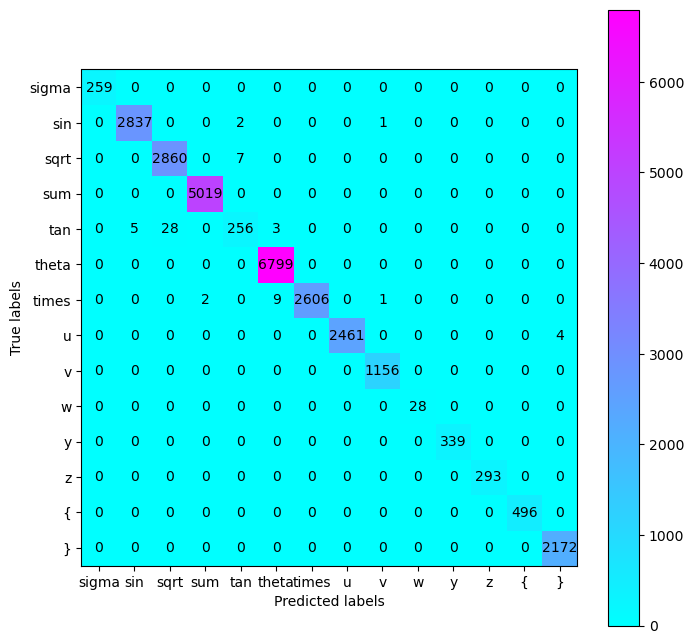

In [67]:
submatrix = confusion_mat[:len(cl_l),:len(cl_l)]

plt.figure(figsize = (8,8))
plt.imshow(submatrix, cmap='cool', interpolation='nearest')
for i in range(submatrix.shape[0]):
    for j in range(submatrix.shape[1]):
        plt.text(j, i, str(submatrix[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.xticks(np.arange(len(cl_l)),cl_l)
plt.yticks(np.arange(len(cl_l)),cl_l)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.show()

In [71]:
cl_l = class_labels[:10]
cl_l

['!', '(', ')', '+', ',', '-', '=', 'A', 'C', 'Delta']

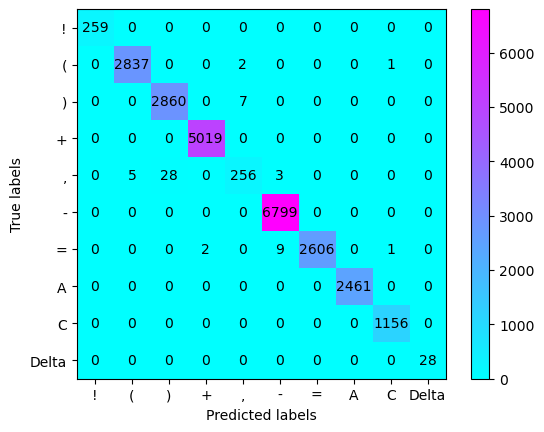

In [73]:
submatrix = confusion_mat[:len(cl_l),:len(cl_l)]

plt.imshow(submatrix, cmap='cool', interpolation='nearest')
for i in range(submatrix.shape[0]):
    for j in range(submatrix.shape[1]):
        plt.text(j, i, str(submatrix[i, j]), ha='center', va='center', color='black')

plt.colorbar()
plt.xticks(np.arange(len(cl_l)),cl_l)
plt.yticks(np.arange(len(cl_l)),cl_l)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.show()

In [161]:
import cv2
img = cv2.imread('two.png', cv2.IMREAD_GRAYSCALE)
img = np.expand_dims(img, axis = 0)
img = np.expand_dims(img, axis = 0)
img = img.astype(np.float32) / 255.0
img.shape

(1, 1, 28, 28)

In [162]:
t_img = torch.from_numpy(img)
t_img = t_img.cuda()

In [150]:
res = model_digit(t_img)
ar = F.softmax(res, dim = 1).cpu().detach().numpy()
#F.softmax(res).detach().numpy()
ar.shape

(1, 10)

In [151]:
np.round(ar,3)

array([[0.   , 0.   , 0.999, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [163]:
model_digit.eval()

output = model_digit(t_img)

probabilities = torch.nn.functional.softmax(output, dim=1)[0]
percentage = torch.max(probabilities).item() * 100
predicted_label = torch.argmax(probabilities).item()

print(f"Метка: {predicted_label}")
print(f"Процент: {percentage}%")

Метка: 2
Процент: 99.99105930328369%


In [160]:
model_symb.eval()

output = model_symb(t_img)
probabilities = torch.nn.functional.softmax(output, dim=1)[0]
percentage = torch.max(probabilities).item() * 100
predicted_label = torch.argmax(probabilities).item()

print(f"Метка: {class_labels[predicted_label]}")
print(f"Процент: {percentage}%")

Метка: sum
Процент: 99.94441866874695%
